https://www.kaggle.com/datasets/hijest/genre-classification-dataset-imdb/data

Importing relevent libraries

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk import SnowballStemmer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

import re
import string

Loading the dataset.
Wealso add custom seperator, assign column names

In [11]:
train_df = pd.read_csv("Genre Classification Dataset/train_data.txt",sep=':::',names=['title','genre','desc'],engine='python')

test_df = pd.read_csv("Genre Classification Dataset/test_data.txt",sep=":::",names=['title','desc'],engine='python')

test_sol_df = pd.read_csv("Genre Classification Dataset/test_data_solution.txt",sep=":::",names=['title','genre','desc'],engine='python')

# add seperator, give names urself, add engine condition to remove error

In [3]:
train_df.head

<bound method NDFrame.head of                                               title          genre  \
1                     Oscar et la dame rose (2009)          drama    
2                                     Cupid (1997)       thriller    
3                 Young, Wild and Wonderful (1980)          adult    
4                            The Secret Sin (1915)          drama    
5                           The Unrecovered (2007)          drama    
...                                             ...            ...   
54210                              "Bonino" (1953)         comedy    
54211                  Dead Girls Don't Cry (????)         horror    
54212    Ronald Goedemondt: Ze bestaan echt (2008)    documentary    
54213                     Make Your Own Bed (1944)         comedy    
54214   Nature's Fury: Storm of the Century (2006)        history    

                                                    desc  
1       Listening in to a conversation between his do...  
2       A b

In [4]:
test_df.head

<bound method NDFrame.head of                                   title  \
1                 Edgar's Lunch (1998)    
2             La guerra de papá (1977)    
3          Off the Beaten Track (2010)    
4               Meu Amigo Hindu (2015)    
5                    Er nu zhai (1955)    
...                                 ...   
54196   "Tales of Light & Dark" (2013)    
54197      Der letzte Mohikaner (1965)    
54198              Oliver Twink (2007)    
54199                Slipstream (1973)    
54200        Curitiba Zero Grau (2010)    

                                                    desc  
1       L.R. Brane loves his life - his car, his apar...  
2       Spain, March 1964: Quico is a very naughty ch...  
3       One year in the life of Albin and his family ...  
4       His father has died, he hasn't spoken with hi...  
5       Before he was known internationally as a mart...  
...                                                  ...  
54196   Covering multiple genres, Tales 

In [5]:
test_sol_df.head

<bound method NDFrame.head of                                   title          genre  \
1                 Edgar's Lunch (1998)       thriller    
2             La guerra de papá (1977)         comedy    
3          Off the Beaten Track (2010)    documentary    
4               Meu Amigo Hindu (2015)          drama    
5                    Er nu zhai (1955)          drama    
...                                 ...            ...   
54196   "Tales of Light & Dark" (2013)         horror    
54197      Der letzte Mohikaner (1965)        western    
54198              Oliver Twink (2007)          adult    
54199                Slipstream (1973)          drama    
54200        Curitiba Zero Grau (2010)          drama    

                                                    desc  
1       L.R. Brane loves his life - his car, his apar...  
2       Spain, March 1964: Quico is a very naughty ch...  
3       One year in the life of Albin and his family ...  
4       His father has died, he hasn'

Check null cells and remove if found any

In [6]:
train_df.isnull().sum()

title    0
genre    0
desc     0
dtype: int64

In [7]:
test_df.isnull().sum()

title    0
desc     0
dtype: int64

Basic visualization

In [8]:
genre_len = train_df['genre'].value_counts()
genre_len

genre
 drama           13613
 documentary     13096
 comedy           7447
 short            5073
 horror           2204
 thriller         1591
 action           1315
 western          1032
 reality-tv        884
 family            784
 adventure         775
 music             731
 romance           672
 sci-fi            647
 adult             590
 crime             505
 animation         498
 sport             432
 talk-show         391
 fantasy           323
 mystery           319
 musical           277
 biography         265
 history           243
 game-show         194
 news              181
 war               132
Name: count, dtype: int64

In [9]:
genre_len = pd.Series.to_dict(genre_len)
genre_name = list(genre_len.keys())
genre_count = list(genre_len.values())

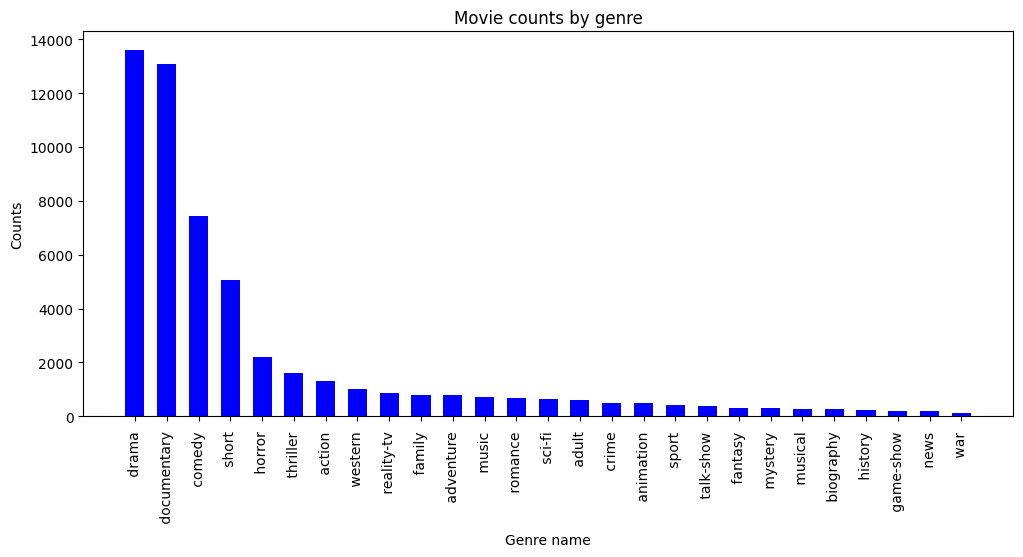

In [10]:
fig = plt.figure(figsize=(12,5))
plt.bar(genre_name,genre_count,color = 'blue',width = 0.6)
plt.xticks(rotation = 90)
plt.xlabel("Genre name")
plt.ylabel("Counts")
plt.title("Movie counts by genre")
plt.show()

Data Preprocessing using SnowBall stemmer

In [12]:
stemmer = SnowballStemmer(language='english')
stop_words = stopwords.words('english')
tfidf_vect = TfidfVectorizer()

In [13]:
def stemming(txt):
    templist=[]
    for tokentxt in nltk.word_tokenize(txt):
        templist.append(stemmer.stem(tokentxt))
    return ' '.join(templist)

def preprocesstext(txt):
    tokentxt = txt.lower()
    tokentxt = re.sub(r'http\S+', '', tokentxt)
    tokentxt = stemming(tokentxt)
    tokentxt = ''.join(i for i in tokentxt if i not in string.punctuation)
    tokentxt = nltk.word_tokenize(tokentxt)
    tokentxt = ' '.join([i for i in tokentxt if i not in stop_words])

    return tokentxt

In [14]:
# g = preprocesstext("Listening in to a conversation between his doctor and parents, http://www.google, 10-year-old Oscar learns what nobody has the courage to tell him. He only has a few weeks to live. Furious, he refuses to speak to anyone except straight-talking Rose, the lady in pink he meets on the hospital stairs. As Christmas approaches, Rose uses her fantastical experiences as a professional wrestler, her imagination, wit and charm to allow Oscar to live life and love to the full, in the company of his friends Pop Corn, Einstein, Bacon and childhood sweetheart Peggy Blue.")
# g

In [15]:
train_df['preprocessed_text'] = train_df['desc'].apply(preprocesstext)
test_df['preprocessed_text'] = test_df['desc'].apply(preprocesstext)

TFIDF

In [16]:
X_tf_train = tfidf_vect.fit_transform(train_df['preprocessed_text'])
X_tf_test = tfidf_vect.transform(test_df['preprocessed_text'])

Splitting

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X_tf_train,train_df['genre'],test_size=0.2,random_state=5)

Create a basic Multinomial Naive Bayes model

In [18]:
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Model Score:", classifier.score(X_train,y_train))
print("Validation Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Model Score: 0.462405754997579
Validation Accuracy: 0.44212856220603153
               precision    recall  f1-score   support

      action        0.00      0.00      0.00       260
       adult        0.00      0.00      0.00        96
   adventure        0.00      0.00      0.00       158
   animation        0.00      0.00      0.00        86
   biography        0.00      0.00      0.00        54
      comedy        0.67      0.03      0.06      1513
       crime        0.00      0.00      0.00       113
 documentary        0.51      0.90      0.65      2615
       drama        0.39      0.86      0.53      2767
      family        0.00      0.00      0.00       162
     fantasy        0.00      0.00      0.00        59
   game-show        0.00      0.00      0.00        42
     history        0.00      0.00      0.00        48
      horror        0.00      0.00      0.00       444
       music        0.00      0.00      0.00       156
     musical        0.00      0.00      0.00   

C:\Users\sidum\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sidum\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sidum\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469

In [18]:
classifier2 = SVC(C=0.5,kernel='linear')
classifier2.fit(X_train, y_train)

y_pred = classifier2.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Model Score:", classifier2.score(X_train,y_train))
print("validation Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

In [19]:
classifier3 = RandomForestClassifier(n_estimators=50, criterion='entropy', max_depth=27)
classifier3.fit(X_train,y_train)

y_pred = classifier3.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Model Score:", classifier3.score(X_train,y_train))
print("Validation Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Model Score: 0.5142837379816007
Validation Accuracy: 0.42958590795905194
               precision    recall  f1-score   support

      action        0.00      0.00      0.00       260
       adult        0.00      0.00      0.00        96
   adventure        0.00      0.00      0.00       158
   animation        0.00      0.00      0.00        86
   biography        0.00      0.00      0.00        54
      comedy        0.87      0.02      0.04      1513
       crime        0.00      0.00      0.00       113
 documentary        0.49      0.89      0.63      2615
       drama        0.38      0.83      0.52      2767
      family        0.00      0.00      0.00       162
     fantasy        0.00      0.00      0.00        59
   game-show        1.00      0.12      0.21        42
     history        0.00      0.00      0.00        48
      horror        1.00      0.00      0.00       444
       music        0.00      0.00      0.00       156
     musical        0.00      0.00      0.00  

C:\Users\sidum\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sidum\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sidum\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469

We split the test with sol data to verify the model accuracy. We can compare our prediction values with ones already known

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X_tf_test,test_sol_df['genre'],test_size=0.99,random_state=5)

In [21]:
y_pred = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Model Score:", classifier.score(X_train,y_train))
print("Validation Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Model Score: 0.488929889298893
Validation Accuracy: 0.437940288493794


C:\Users\sidum\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

      action        0.00      0.00      0.00      1306
       adult        0.00      0.00      0.00       586
   adventure        0.00      0.00      0.00       767
   animation        0.00      0.00      0.00       489
   biography        0.00      0.00      0.00       260
      comedy        0.75      0.03      0.06      7378
       crime        0.00      0.00      0.00       500
 documentary        0.52      0.90      0.65     12949
       drama        0.38      0.87      0.53     13467
      family        0.00      0.00      0.00       775
     fantasy        0.00      0.00      0.00       321
   game-show        0.00      0.00      0.00       193
     history        0.00      0.00      0.00       240
      horror        0.00      0.00      0.00      2171
       music        0.00      0.00      0.00       728
     musical        0.00      0.00      0.00       273
     mystery        0.00      0.00      0.00       317
        n

C:\Users\sidum\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sidum\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
y_pred = classifier2.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Model Score:", classifier2.score(X_train,y_train))
print("Validation Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

In [23]:
y_pred = classifier3.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Model Score:", classifier3.score(X_train,y_train))
print("Validation Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Model Score: 0.45571955719557194
Validation Accuracy: 0.4252860710425286


C:\Users\sidum\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sidum\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

      action        0.00      0.00      0.00      1306
       adult        0.00      0.00      0.00       586
   adventure        1.00      0.00      0.01       767
   animation        0.00      0.00      0.00       489
   biography        0.00      0.00      0.00       260
      comedy        0.79      0.02      0.04      7378
       crime        0.00      0.00      0.00       500
 documentary        0.49      0.87      0.63     12949
       drama        0.37      0.83      0.52     13467
      family        0.00      0.00      0.00       775
     fantasy        0.00      0.00      0.00       321
   game-show        1.00      0.06      0.12       193
     history        0.00      0.00      0.00       240
      horror        1.00      0.00      0.00      2171
       music        1.00      0.00      0.01       728
     musical        0.00      0.00      0.00       273
     mystery        0.00      0.00      0.00       317
        n

C:\Users\sidum\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Use tensorflow model

In [24]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, SpatialDropout1D

In [25]:
word_num = 20000
max_len = 200

embed_dim = 100

tokenizer = Tokenizer(num_words=word_num)

In [26]:
X = tokenizer.texts_to_sequences(train_df['preprocessed_text'].values)
X = pad_sequences(X, maxlen=max_len)

y = pd.get_dummies(train_df['genre'].values)

In [27]:
X_test_tf = tokenizer.texts_to_sequences(test_df['preprocessed_text'].values)
X_test_tf = pad_sequences(X_test_tf,maxlen=max_len)

y_test_tf = pd.get_dummies(test_sol_df['genre'].values)

In [28]:
model = Sequential()
model.add(Embedding(word_num, embed_dim, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.1, recurrent_dropout=0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(27, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [29]:
history = model.fit(X, y, epochs=10, batch_size=32, validation_data=(X_test_tf,y_test_tf))

Epoch 1/10


1695/1695 [==============================] - 348s 203ms/step - loss: 2.3652 - accuracy: 0.2486 - val_loss: 2.3449 - val_accuracy: 0.2416
Epoch 2/10
1695/1695 [==============================] - 337s 199ms/step - loss: 2.3511 - accuracy: 0.2479 - val_loss: 2.3464 - val_accuracy: 0.2416
Epoch 3/10
1695/1695 [==============================] - 333s 196ms/step - loss: 2.3494 - accuracy: 0.2466 - val_loss: 2.3485 - val_accuracy: 0.2511
Epoch 4/10
1695/1695 [==============================] - 333s 196ms/step - loss: 2.3485 - accuracy: 0.2479 - val_loss: 2.3440 - val_accuracy: 0.2511
Epoch 5/10
1695/1695 [==============================] - 339s 200ms/step - loss: 2.3477 - accuracy: 0.2476 - val_loss: 2.3428 - val_accuracy: 0.2416
Epoch 6/10
1695/1695 [==============================] - 335s 198ms/step - loss: 2.3467 - accuracy: 0.2475 - val_loss: 2.3447 - val_accuracy: 0.2416
Epoch 7/10
1695/1695 [==============================] - 331s 195ms/step - loss: 2.3464 - accuracy: 0.2484 - va

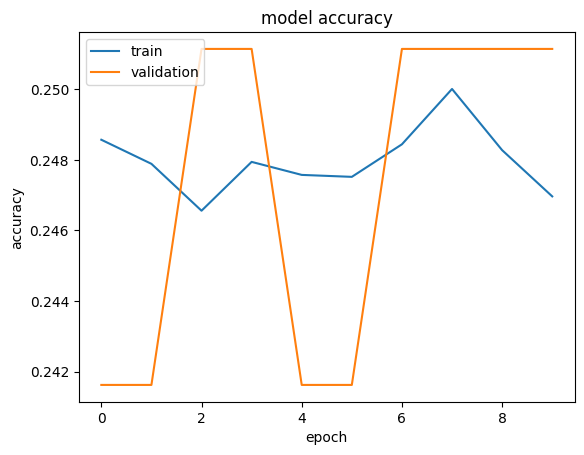

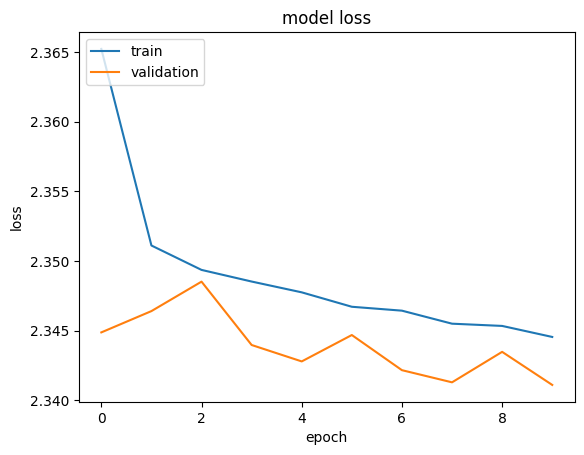

In [30]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Loss plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


In [31]:
model2 = Sequential()
model2.add(Embedding(word_num, embed_dim, input_length=X.shape[1]))
model2.add(SpatialDropout1D(0.2))
#model2.add(LSTM(100, dropout=0.1, recurrent_dropout=0.2))
#model2.add(Dense(256, activation='relu'))
model2.add(Dense(100, activation='sigmoid'))
#model2.add(Dropout(0.2))
model2.add(Dense(27, activation='softmax'))
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history2 = model.fit(X, y, epochs=10, batch_size=32, validation_data=(X_test_tf,y_test_tf))

In [ ]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Loss plot
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


In [ ]:
# on my laptop model2 doesnt pass over 0.20, 

Manual movie test

In [41]:
def predict_movie_genre(name, desc):
    df = [[name, desc]]
    df = pd.DataFrame(df, columns=["name","desc"] )
    df["preprocessed_text"] = df["desc"].apply(preprocesstext)
    test = tfidf_vect.transform(df['preprocessed_text'])
    pred = classifier.predict(test)
    print(pred)

In [ ]:
name = input("Enter the name of movie: ")
desc = input("Enter the description of movie: ")

predict_movie_genre(name, desc)